In [72]:
import subprocess
import timeit
import functools
import numpy as np
import matplotlib.pyplot as plt

niterations = 2
timeoutvalue = 240

In [73]:
def send_mc_command_classical(formula, trfile):
    aux = lambda x: subprocess.check_output(x, shell = True)
    command = "gtimeout " + str(timeoutvalue) + " dtl-model-checking-exe -modelCheck {i} \"{j}\" 2".format(j=formula, i=trfile)
    try:
        time = timeit.timeit(
                   functools.partial(aux, command),
                   number = niterations
       )
        return time/niterations
    except Exception as e:
        print(e)
        return timeoutvalue #this corresponds to the timeout value
    
def send_mc_command_bounded(formula, trfile):
    aux = lambda x: subprocess.check_output(x, shell = True)
    command = "gtimeout " + str(timeoutvalue) + " dtl-model-checking-exe -modelCheck {i} \"{j}\" 2 -bounded 15".format(j=formula, i=trfile)
    try:
        time = timeit.timeit(
                   functools.partial(aux, command),
                   number = niterations
       )
        return time/niterations
    except Exception as e:
        print(e)
        return timeoutvalue #this corresponds to the timeout value

def get_times_classical_approach(formulas, systems):
    values = np.zeros((len(formulas), len(systems)))
    timeouts = np.zeros((len(formulas), len(systems)))
    for fList in zip(formulas, range(len(formulas))):
        for tList in zip(systems, range(len(systems))):
            times = []
            for f in fList[0]:
                for t in tList[0]:
                    times.append(send_mc_command_classical(f, t))
            mean_times, tms = mean_with_timeout_checker(times)
            values[fList[1], tList[1]] = mean_times
            timeouts[fList[1], tList[1]] = tms
    return values, timeouts

def get_times_bounded(formulas, systems):
    values = np.zeros((len(formulas), len(systems)))
    timeouts = np.zeros((len(formulas), len(systems)))
    for fList in zip(formulas, range(len(formulas))):
        for tList in zip(systems, range(len(systems))):
            times = []
            for f in fList[0]:
                for t in tList[0]:
                    times.append(send_mc_command_bounded(f, t))
            mean_times, tms = mean_with_timeout_checker(times)
            values[fList[1], tList[1]] = mean_times
            timeouts[fList[1], tList[1]] = tms
    return values, timeouts

def mean_with_timeout_checker(value_list):
    new_value_list = list(filter(lambda x: x!=timeoutvalue, value_list))
    timeouts = len(list(filter(lambda x: x==timeoutvalue, value_list)))
    if new_value_list:
        return sum(new_value_list) / len(new_value_list), timeouts
    else:
        return timeoutvalue, timeouts



In [74]:
formulasWithLength2 = ["@_1((p1)=>(p2))", "@_1(c_2(q1))", "@_1(X(p1))", "@_1(G(p1))"]

formulasWithLength3 = ["@_1((X(p1))=>(p2))", "@_1((c_2(q1))=>(p1))", "@_1(c_2(G(q1)))", "(@_1(p1))=>(@_2(q1))"]

formulasWithLength4 = ["@_1((c_2(q1))=>(~(p1)))", "@_1((c_2(q1))=>(X(p1)))", "(@_1(p1))=>(@_2(~(q1)))", "@_1(c_2(~(G(q1))))"]

formulasWithLength5 = ["@_1((G(p1))=>((c_2(q1))=>(p2))", "(@_1((p1)=>(G(p2))))=>(@_2(q1))",
                       "@_1((X(p1))=>(c_2(G(q1))))", "@_1((X(p1))=>(c_2(X(q1))))"]

formulasWithLength6 = ["@_1((X(X(p1)))=>(c_2(G(q1))))", "@_1((X(G(G(p1))))=>(c_2(q2)))"
                      ,"(@_1((G(p1))=>(X(p2))))=>(@_2(q_2))", "(@_1(G(~(p1))))=>(@_2(G(q2)))"]

formulasWithLength7 = ["@_1(((G(~(p1)))=>(p2))=>(X(G(p2))))", "@_2((X(G(~(q1))))=>(c_1((p1)=>(p2))))",
                       "(@_1(~(G(X(p2)))))=>(@_2(G(q1)))", "(@_2(c_1(G(~(p2)))))=>(@_2(X(q1)))"]


# Reverse this to have smaller formulas on bottom
allFormulas = list(reversed([formulasWithLength2, formulasWithLength3, formulasWithLength4, formulasWithLength5,
                             formulasWithLength6, formulasWithLength7]))


pathsSize8 = ["../dtl-model-checking/ExampleFiles/t8States1",
              "../dtl-model-checking/ExampleFiles/t8States2",
              "../dtl-model-checking/ExampleFiles/t8States3",
              "../dtl-model-checking/ExampleFiles/t8States4"]

pathsSize16 = ["../dtl-model-checking/ExampleFiles/t16States1",
               "../dtl-model-checking/ExampleFiles/t16States2",
               "../dtl-model-checking/ExampleFiles/t16States3",
               "../dtl-model-checking/ExampleFiles/t16States4"]

pathsSize32 = ["../dtl-model-checking/ExampleFiles/t32States1",
               "../dtl-model-checking/ExampleFiles/t32States2",
               "../dtl-model-checking/ExampleFiles/t32States3",
               "../dtl-model-checking/ExampleFiles/t32States4"]

pathsSize64 = ["../dtl-model-checking/ExampleFiles/t64States1",
               "../dtl-model-checking/ExampleFiles/t64States2"]

pathsSize128 = ["../dtl-model-checking/ExampleFiles/t128States1",
                "../dtl-model-checking/ExampleFiles/t128States2"]

pathsSize256 = ["../dtl-model-checking/ExampleFiles/t256States1",
                "../dtl-model-checking/ExampleFiles/t256States2"]


allDTSs = [pathsSize8, pathsSize16, pathsSize32, pathsSize64, pathsSize128, pathsSize256]


timesA, time_outsA = get_times_classical_approach(allFormulas, allDTSs)
print(timesA)
print(time_outsA)

print("\n\nAUTOMATA DONE.\nDOING FOR BMC...")

timesB, time_outsB = get_times_bounded(allFormulas, allDTSs)
print(timesB)
print(time_outsB)

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t8States1 "@_2((X(G(~(q1))))=>(c_1((p1)=>(p2))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t8States2 "@_2((X(G(~(q1))))=>(c_1((p1)=>(p2))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t8States3 "@_2((X(G(~(q1))))=>(c_1((p1)=>(p2))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t8States4 "@_2((X(G(~(q1))))=>(c_1((p1)=>(p2))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t16States1 "@_1(((G(~(p1)))=>(p2))=>(X(G(p2))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t16States

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t8States1 "@_1((X(X(p1)))=>(c_2(G(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t8States2 "@_1((X(X(p1)))=>(c_2(G(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t8States3 "@_1((X(X(p1)))=>(c_2(G(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t8States4 "@_1((X(X(p1)))=>(c_2(G(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t8States1 "@_1((X(G(G(p1))))=>(c_2(q2)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t8States2 "@_1((X(G(G(p1))))=>(c_2(q2)))" 2' ret

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t128States2 "(@_1(G(~(p1))))=>(@_2(G(q2)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t256States1 "@_1((X(X(p1)))=>(c_2(G(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t256States2 "@_1((X(X(p1)))=>(c_2(G(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t256States1 "@_1((X(G(G(p1))))=>(c_2(q2)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t256States2 "@_1((X(G(G(p1))))=>(c_2(q2)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t256States1 "(@_1((G(p1))=>(X(p2))))=>

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t256States2 "(@_1((p1)=>(G(p2))))=>(@_2(q1))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t256States1 "@_1((X(p1))=>(c_2(G(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t256States2 "@_1((X(p1))=>(c_2(G(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t256States1 "@_1((X(p1))=>(c_2(X(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t256States2 "@_1((X(p1))=>(c_2(X(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t64States1 "@_1((c_2(q1))=>(X(p1)))" 2' returned

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t16States3 "@_1((G(p1))=>((c_2(q1))=>(p2))" 2 -bounded 15' returned non-zero exit status 1.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t16States4 "@_1((G(p1))=>((c_2(q1))=>(p2))" 2 -bounded 15' returned non-zero exit status 1.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t16States1 "@_1((X(p1))=>(c_2(X(q1))))" 2 -bounded 15' returned non-zero exit status 1.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t16States3 "@_1((X(p1))=>(c_2(X(q1))))" 2 -bounded 15' returned non-zero exit status 1.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t16States4 "@_1((X(p1))=>(c_2(X(q1))))" 2 -bounded 15' returned non-zero exit status 1.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/

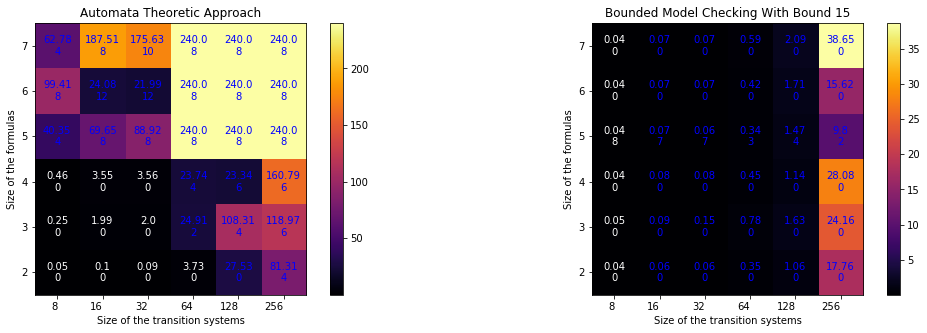

In [75]:
sizeOfFormulas = list(reversed(['2', '3', '4', '5', '6', '7']))
sizeOfTransitionSystems = ['8', '16', '32', '64', '128', '256']

# quick example instances
times = np.array([[ 0.37484048,  3.52231947,  3.38275967, 24.01992316],
                  [ 0.22080506,  2.2404991 ,  1.97254386, 22.97497471],
                  [ 0.06844611,  0.08082539,  0.08530775,  3.47099287]])

timeouts = np.array([[0., 0., 0., 4.],
                     [0., 0., 0., 2.],
                     [0., 0., 0., 0.]])


text_colors = ['w', 'b']
thresholdA = 3
thresholdB = 0.01

fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(18.3, 5, forward=True)
ax1.set_title('Automata Theoretic Approach')
ax2.set_title('Bounded Model Checking With Bound 15')
ax1.set_xlabel('Size of the transition systems')
ax1.set_ylabel('Size of the formulas')
ax2.set_xlabel('Size of the transition systems')
ax2.set_ylabel('Size of the formulas')


# Plotting the times for the Automata Theoretic Approach

im1 = ax1.imshow(timesA, cmap=plt.cm.inferno)

# We want to show all ticks...
ax1.set_xticks(np.arange(len(sizeOfTransitionSystems)))
ax1.set_yticks(np.arange(len(sizeOfFormulas)))
# ... and label them with the respective list entries
ax1.set_xticklabels(sizeOfTransitionSystems)
ax1.set_yticklabels(sizeOfFormulas)

# Rotate the tick labels and set their alignment.
plt.setp(ax1.get_xticklabels(), ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(sizeOfFormulas)):
    for j in range(len(sizeOfTransitionSystems)):
        text = ax1.text(j, i, str(round(timesA[i, j], 2)) +"\n" + str(int(time_outsA[i, j])),
                       ha="center", va="center", color=text_colors[int(im.norm(timesA[i, j]) > thresholdA)])
        

# Plotting the times for the bounded model checking 
im2 = ax2.imshow(timesB, cmap=plt.cm.inferno)

# We want to show all ticks...
ax2.set_xticks(np.arange(len(sizeOfTransitionSystems)))
ax2.set_yticks(np.arange(len(sizeOfFormulas)))
# ... and label them with the respective list entries
ax2.set_xticklabels(sizeOfTransitionSystems)
ax2.set_yticklabels(sizeOfFormulas)

# Rotate the tick labels and set their alignment.
plt.setp(ax2.get_xticklabels(), ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(sizeOfFormulas)):
    for j in range(len(sizeOfTransitionSystems)):
        text = ax2.text(j, i, str(round(timesB[i, j], 2)) +"\n" + str(int(time_outsB[i, j])),
                       ha="center", va="center", color=text_colors[int(im.norm(timesB[i, j]) > thresholdB)])
        

# adding a color bar
#cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbarA = fig.colorbar(im1, ax = ax1)
cbarB = fig.colorbar(im2, ax = ax2)
plt.show()